In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
path = r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\\"
savepath = r"C:\Users\hexie\OneDrive\Desktop\Sampling_codes\plots\\"

def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)


    
with open(r"C:\Users\hexie\OneDrive\Desktop\Projects\SAMPLING_DESKTOP\Sampling_codes\CommunityFitNet_updated.pickle", "rb") as input_file:
    DATA = pickle.load(input_file)

Domains = DATA["networkDomain"] 
types = np.unique(Domains)

finished = np.loadtxt("finished_net.txt").astype("int")
netlist = finished
dom = np.load("domains.npy", allow_pickle=True)


Biological_index = [i for i, x in enumerate(dom) if x == "Biological"]
Economic_index = [i for i, x in enumerate(dom) if x == "Economic"]
Informational_index = [i for i, x in enumerate(dom) if x == "Informational"]
Social_index = [i for i, x in enumerate(dom) if x == "Social"]
Technological_index = [i for i, x in enumerate(dom) if x == "Technological"]
Transportation_index = [i for i, x in enumerate(dom) if x == "Transportation"]


def return_types(auc):
    temp = []
    for ty in types:
        indexes = [index for index in range(len(dom)) if dom[index] == ty]

        data = []
        for i in range(20):
            data.append(np.median(auc[indexes][:,i].tolist()))
            #data.append(auc[indexes][:,i])
        temp.append(data)
    return temp



sampling_methods = ['RandomNodeSampler', 'DegreeBasedSampler', 'PageRankBasedSampler', 'RandomEdgeSampler',
 'RandomNodeEdgeSampler', 'HybridNodeEdgeSampler',
 'RandomEdgeSamplerWithInduction', 'DiffusionSampler',
 'ForestFireSampler',
 'NonBackTrackingRandomWalkSampler', 'LoopErasedRandomWalkSampler',
 'RandomWalkSampler', 'RandomWalkWithRestartSampler','MetropolisHastingsRandomWalkSampler', 'CirculatedNeighborsRandomWalkSampler', 'BreadthFirstSearchSampler',
 'DepthFirstSearchSampler', 'RandomWalkWithJumpSampler',
 'RandomNodeNeighborSampler', 'ShortestPathSampler']



auc_methods = ['aa', 'n2v_dot_prod', 'pa', 'n2v_edge_emb', 'jc', 'dcsbm', 'mod', 'spec', 'olp']



auc_aa = np.load("20auc_aa.npy", allow_pickle=True)
auc_prob = np.load("20auc_prob.npy", allow_pickle=True)
auc_pa = np.load("20auc_pa.npy", allow_pickle=True)
auc_emb = np.load("20auc_emb.npy", allow_pickle=True)
auc_olp = np.load("20auc_olp.npy", allow_pickle=True)
auc_jc = np.load("20auc_jc.npy", allow_pickle=True)
auc_gae = np.load("20auc_gae.npy", allow_pickle=True)
auc_dcsbm = np.load("20auc_dcsbm.npy", allow_pickle=True)
auc_mod = np.load("20auc_mod.npy", allow_pickle=True)
auc_spec = np.load("20auc_spec.npy", allow_pickle=True)



auc_aa_1 = np.load("auc_aa_wonan.npy", allow_pickle=True)
auc_prob_1 = np.load("auc_prob_wonan.npy", allow_pickle=True)
auc_pa_1 = np.load("auc_pa_wonan.npy", allow_pickle=True)
auc_emb_1 = np.load("auc_emb_wonan.npy", allow_pickle=True)
auc_olp_1 = np.load("auc_olp_wonan.npy", allow_pickle=True)
auc_jc_1 = np.load("auc_jc_wonan.npy", allow_pickle=True)
auc_gae_1 = np.load("auc_gae_wonan.npy", allow_pickle=True)
auc_dcsbm_1 = np.load("auc_dcsbm_wonan.npy", allow_pickle=True)
auc_mod_1 = np.load("auc_modularity_wonan.npy", allow_pickle=True)
auc_spec_1 = np.load("auc_spectral_wonan.npy", allow_pickle=True)


auc_aa_1 [np.isnan(auc_aa_1 )] = 0
auc_prob_1 [np.isnan(auc_prob_1 )] = 0
auc_pa_1 [np.isnan(auc_pa_1 )] = 0
auc_emb_1 [np.isnan(auc_emb_1 )] = 0
auc_olp_1 [np.isnan(auc_olp_1 )] = 0
auc_jc_1 [np.isnan(auc_jc_1 )] = 0
auc_dcsbm_1 [np.isnan(auc_dcsbm_1 )] = 0
auc_mod_1 [np.isnan(auc_mod_1 )] = 0
auc_spec_1 [np.isnan(auc_spec_1 )] = 0





In [2]:
def plot_pca_samp(input_data,title):
    pca = PCA(n_components=2)
    reduced_feat_matrix = pca.fit_transform(input_data)
    pca.fit(reduced_feat_matrix)
    plt.rcParams.update({'font.size': 10})

    fig, ax = plt.subplots()
    x = reduced_feat_matrix[:,0]
    y = reduced_feat_matrix[:,1]

    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = 21
    colors_list =[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    #random.shuffle(colors_list)
    #colors_list = ['black']*20


    #ccc = ["lightblue", "bisque", "purple", "lightcoral"]
    cdict = {}
    mdict = {}

    mymarkers = ["o", "v","^","<",">","1","2","3","4","s","p","P","*","h","H","+","x","X","D","d","."]

    for i, txt in enumerate(sampling_methods):
        cdict[txt] = colors_list[i]
        mdict[txt] = mymarkers[i]

    for i, txt in enumerate(sampling_methods):
        plt.scatter(-x[i], y[i], c = cdict[txt], marker = mdict[txt], label = txt, s = 100)
    plt.legend(loc='upper center', bbox_to_anchor=(1, 1.8), fancybox=False, shadow=False, ncol=5)
    plt.title(str(title))
    
    fig.savefig("fig3.5-samp_diff"+".pdf", bbox_inches='tight')

In [3]:
def plot_pca_data(input_data,title):
    pca = PCA(n_components=2)
    reduced_feat_matrix = pca.fit_transform(input_data)
    pca.fit(reduced_feat_matrix)
    plt.rcParams.update({'font.size': 10})

    fig, ax = plt.subplots()
    x = reduced_feat_matrix[:,0]
    y = reduced_feat_matrix[:,1]

    cm = plt.get_cmap('gist_rainbow')
    #random.shuffle(colors_list)
    #colors_list = ['black']*20

    domlist= np.unique(dom)
    ccc = ["lightblue", "bisque", "purple", "lightcoral", "green", "orange"]
    mymarkers = ["o", "v","^","<",">","1"]
    cdict = dict(zip(domlist,ccc))
    mdict = dict(zip(domlist,mymarkers))



    for i, txt in enumerate(dom):
        plt.scatter(-x[i], y[i], c = cdict[txt], marker = mdict[txt],  s = 100)
        
    for j, cc in enumerate(domlist):
        plt.scatter(0, 0, c = cdict[cc], marker = mdict[cc], label =domlist[j],  s = 100)
        
    plt.legend(loc='lower right', fancybox=False, shadow=False, ncol=1)
    plt.title(str(title))
    fig.savefig("fig3-data_diff"+".pdf", bbox_inches='tight')
    
# plot_pca_samp(auc_olp_1, "OLP PCA for sampling")
# plot_pca_samp(auc_aa_1, "AA PCA for sampling")
# plot_pca_samp(auc_prob_1, "PROB PCA for sampling")
# plot_pca_samp(auc_pa_1, "PA PCA for sampling")
# plot_pca_samp(auc_emb_1, "EMB PCA for sampling")
# plot_pca_samp(auc_jc_1, "JC PCA for sampling")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

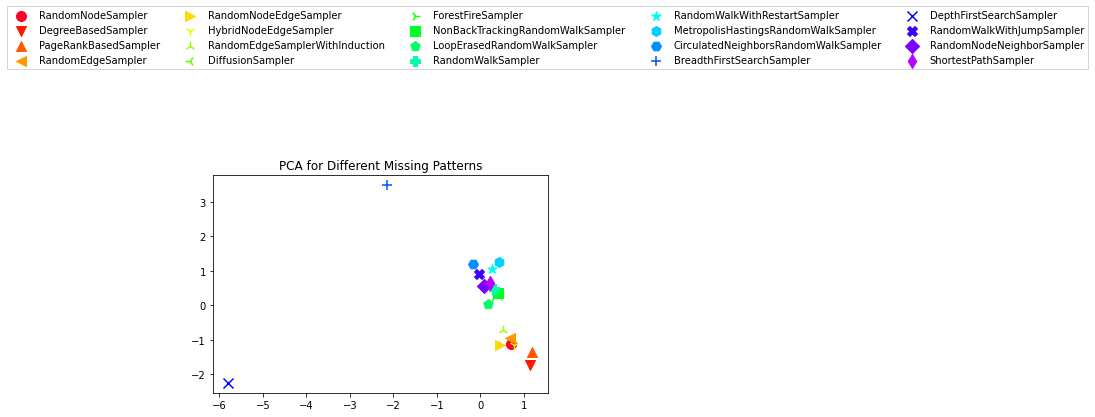

In [4]:
samp_pca_1 = np.vstack((auc_olp_1,auc_aa_1,auc_prob_1,auc_pa_1,auc_emb_1,auc_jc_1,auc_dcsbm_1,auc_mod_1, auc_spec_1)).transpose()
plot_pca_samp(samp_pca_1,"PCA for Different Missing Patterns")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

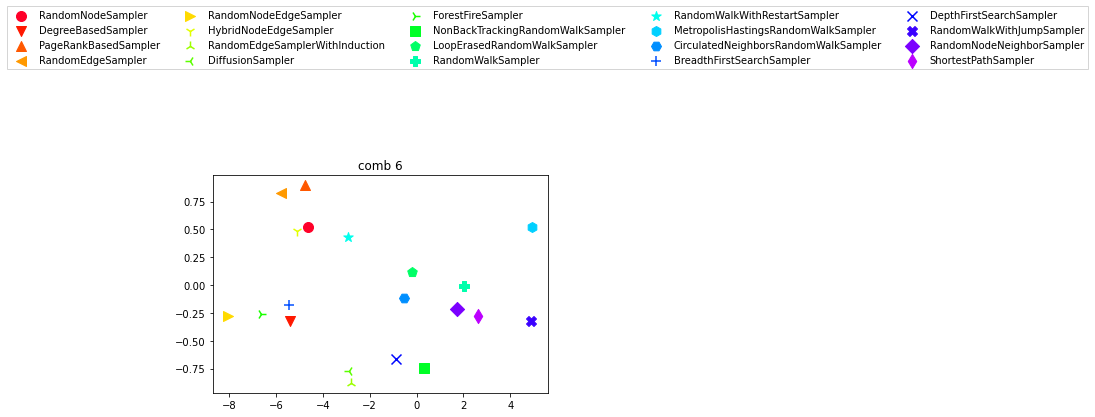

In [5]:
samp_pca_6 = auc_olp_1+auc_aa_1+auc_prob_1+auc_pa_1+auc_emb_1+auc_jc_1 + auc_dcsbm_1 + auc_mod_1 + auc_spec_1 
plot_pca_samp(samp_pca_6,"comb 6")

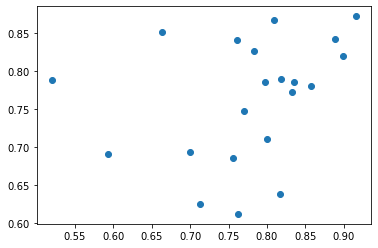

In [60]:
from sklearn.cluster import DBSCAN
X = samp_pca_1
model = DBSCAN(eps=0.30, min_samples=9)
yhat = model.fit_predict(X)
clusters = np.unique(yhat)
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X[row_ix, 0], X[row_ix, 1])

In [ ]:
######################################### FROM HERE ON PLOTS FOR DATA PCA #######################################

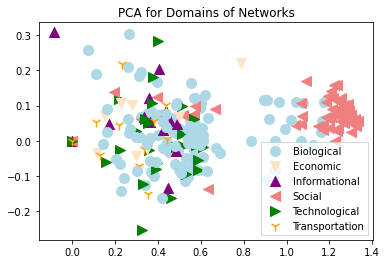

In [6]:
plot_pca_data(samp_pca_1.transpose(),"PCA for Domains of Networks")



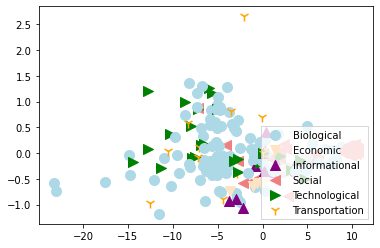

In [49]:
plot_pca_data(samp_pca_6,"PLUS FOR DATA")

In [19]:
#################### TRY TO DO KMEANS TO THE SAMPLING METHODS#########################

from sklearn.cluster import KMeans

#X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

X = samp_pca_1

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.labels_


array([4, 0, 0, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1])

In [10]:
sampling_methods = ['Random Node Sampler', 'Degree Based Sampler', 'Page Rank Based Sampler', 'Random Edge Sampler',
 'Random Node Edge Sampler', 'Hybrid Node Edge Sampler',
 'Random Edge Sampler With Induction', 'Diffusion Sampler',
 'Forest Fire Sampler',
 'Nonbacktracking Randomwalk Sampler', 'Loop Erased Randomwalk Sampler',
 'Randomwalk Sampler', 'Randomwalk With Restart Sampler','Metropolis Hastings Randomwalk Sampler', 
 'Circulated Neighbors Randomwalk Sampler', 'Breadth First Search Sampler',
 'Depth First Search Sampler', 'Randomwalk With Jump Sampler',
 'Random Node Neighbor Sampler', 'Shortest Path Sampler']